In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

In [3]:
data_ocupacionNodo = pd.read_csv('datosNuevoModelo/OCUPACION_NODO.csv', sep=';')
data_NodoINFI = pd.read_csv('datosNuevoModelo/NODO_INFI.csv', sep=';')
data_INFO_OOKLA = pd.read_csv('datosNuevoModelo/NODOS_INFO_OOKLA.csv', sep=';')
data_SEG = pd.read_csv('datosNuevoModelo/segmentaciones/compiladoFinal.csv', sep=';')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data_ocupacionNodo.head()

,COD_NODO,FECHA,OCUPACION_DW,OCUPACION_UP
0,0SM,2021-06-01,0.645369,0.358797
1,RD6,2020-08-01,0.355756,0.439774
2,VRS12D,2020-11-01,0.555039,0.235540
3,3NM,2020-08-01,0.276692,0.268652
4,PKE,2020-06-01,0.355112,0.124435


In [5]:
data_NodoINFI.head()

,NODO,CANT_USER,PROM_VEL,MEDIANA_VEL,VEL_ME_8,VEL_10_25,VEL_30,VEL_40_50,VEL_MA_60,VEL_MAX,VEL_MIN,RENTA,PROM_RENTA,CONVERGENTE,SERV_INT,SERV_TV,SERV_VOZ,MES,ANIO,CANT_CALL
0,10,54,56,50,NaN,4.0,8.0,25.0,17.0,150,10,6660222,123337,18,54,40,47,1,21,5.0
1,10,53,58,50,NaN,2.0,8.0,26.0,17.0,150,10,6566817,123902,18,53,39,46,2,21,8.0
2,10,56,60,50,NaN,2.0,8.0,26.0,20.0,150,10,7017707,125316,18,56,41,47,3,21,5.0
3,10,55,77,60,NaN,2.0,7.0,18.0,28.0,160,10,6797236,123586,19,55,40,46,4,21,1.0
4,10,56,82,68,NaN,1.0,7.0,18.0,30.0,160,15,6813012,121661,20,56,42,47,5,21,3.0


In [6]:
data_INFO_OOKLA.head()

,NODO,ANIO,MES,OPERADOR,CANTIDAD,DOWNLOAD_KBPS,UPLOAD_KBPS,LATENCY,FLAG_LAT
0,CT511M,2021,4,MOVISTAR,1,7.578125,0.857422,35.000000,0
1,49J,2020,10,TIGO,819,22.327406,4.453991,30.362637,0
2,UD74D,2021,6,MOVISTAR,2,6.027344,0.693359,30.000000,0
3,BHS,2021,1,MOVISTAR,3,3.940755,0.980143,37.666667,0
4,1TM,2020,9,CLARO,15,32.773177,6.304427,18.333333,0


In [7]:
data_SEG.head()

,Nodo,NUEVA ESTRUCTURA,fecha
0,BLT,REGION CENTRO,1/1/2021
1,EMA,REGION CENTRO,1/1/2021
2,IVT,REGION CENTRO,1/1/2021
3,HLC,REGION CENTRO,1/1/2021
4,S2D,REGION COSTA,1/1/2021


##  Exploracion

In [8]:
data_ocupacionNodo.describe()

,OCUPACION_DW,OCUPACION_UP
count,208705.000000,207394.000000
mean,0.432441,0.375158
std,0.182292,0.163834
min,0.000000,0.000000
25%,0.299206,0.253608
50%,0.424570,0.360321
75%,0.558110,0.480289
max,1.045716,1.404492


In [9]:
data_NodoINFI.describe()

,CANT_USER,PROM_VEL,MEDIANA_VEL,VEL_ME_8,VEL_10_25,VEL_30,VEL_40_50,VEL_MA_60,VEL_MAX,RENTA,PROM_RENTA,CONVERGENTE,SERV_INT,SERV_TV,SERV_VOZ,MES,ANIO,CANT_CALL
count,266764.000000,266764.000000,266764.000000,204622.000000,254320.000000,262608.000000,263718.000000,259672.000000,266764.000000,2.667640e+05,266764.000000,266764.000000,266764.000000,266764.000000,266764.000000,266764.000000,266764.000000,251070.000000
mean,194.081068,48.995749,41.291527,28.570965,40.414871,47.728496,46.836511,41.451400,180.402476,2.012267e+07,109601.525596,75.510118,194.081068,160.458758,156.448411,5.708057,20.407742,14.401478
std,150.903069,26.337440,23.650740,39.389236,45.472028,42.499073,44.523525,48.887368,285.869993,1.497225e+07,20709.132954,62.972181,150.903069,127.834226,122.619573,3.191791,0.491416,13.531193
min,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000e+03,4000.000000,0.000000,1.000000,0.000000,0.000000,1.000000,20.000000,1.000000
25%,70.000000,30.000000,30.000000,3.000000,8.000000,14.000000,14.000000,10.000000,150.000000,8.034675e+06,95833.750000,27.000000,70.000000,56.000000,57.000000,3.000000,20.000000,5.000000
50%,160.000000,42.000000,30.000000,11.000000,25.000000,35.000000,33.000000,24.000000,150.000000,1.705358e+07,108095.000000,60.000000,160.000000,130.000000,129.000000,6.000000,20.000000,11.000000
75%,286.000000,59.000000,50.000000,41.000000,57.000000,72.000000,66.000000,54.000000,200.000000,2.905311e+07,119683.250000,106.000000,286.000000,237.000000,229.000000,8.000000,21.000000,20.000000
max,1398.000000,1115.000000,300.000000,481.000000,703.000000,483.000000,461.000000,683.000000,90000.000000,1.258915e+08,346875.000000,588.000000,1398.000000,1005.000000,1123.000000,12.000000,21.000000,318.000000


In [10]:
data_INFO_OOKLA.describe()

,ANIO,MES,CANTIDAD,DOWNLOAD_KBPS,UPLOAD_KBPS,LATENCY,FLAG_LAT
count,394891.000000,394891.000000,394891.000000,394891.000000,394891.000000,394891.000000,394891.000000
mean,2020.582941,6.467093,32.052670,43.881678,20.351471,26.770443,0.527123
std,0.493073,3.462343,402.038394,37.467096,33.387853,46.413833,0.790358
min,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,3.000000,2.000000,17.893156,4.791016,12.657895,0.000000
50%,2021.000000,6.000000,7.000000,34.329102,7.235677,20.000000,0.000000
75%,2021.000000,9.000000,16.000000,59.247984,13.273401,30.367007,1.000000
max,2021.000000,12.000000,41421.000000,516.664551,563.410156,7619.000000,2.000000


In [11]:
data_SEG.describe()

,Nodo,NUEVA ESTRUCTURA,fecha
count,1228,684,1228
unique,1182,5,19
top,LBE1,REGION CENTRO,1/6/2021
freq,3,349,205


###  Ocupación

In [12]:
from datetime import date
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
import numpy as np
from sklearn.model_selection import train_test_split  #division en conjunto entrenamiento y pruebas
import shap
import matplotlib.pyplot as plt

In [13]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [14]:
data_ocupacionNodo.head()

,COD_NODO,FECHA,OCUPACION_DW,OCUPACION_UP
0,0SM,2021-06-01,0.645369,0.358797
1,RD6,2020-08-01,0.355756,0.439774
2,VRS12D,2020-11-01,0.555039,0.235540
3,3NM,2020-08-01,0.276692,0.268652
4,PKE,2020-06-01,0.355112,0.124435


In [19]:
data_ocupacionNodo.dtypes

COD_NODO                object
FECHA           datetime64[ns]
OCUPACION_DW           float64
OCUPACION_UP           float64
mesAnt                   int64
dtype: object

In [20]:
data_ocupacionNodo['FECHA']=data_ocupacionNodo['FECHA'].astype('datetime64[ns]')

In [21]:
#data_ocupacionNodo['mesAnt']=diff_month(data_ocupacionNodo['FECHA'],date.today())
#data_ocupacionNodo['mesAnt']={lambda x: diff_month(x,date.today())}
data_ocupacionNodo['mesAnt']=(data_ocupacionNodo['FECHA'].dt.year-date.today().year)*12+data_ocupacionNodo['FECHA'].dt.month-date.today().month

In [22]:
data_ocupacionNodo.head()

,COD_NODO,FECHA,OCUPACION_DW,OCUPACION_UP,mesAnt
0,0SM,2021-06-01,0.645369,0.358797,-2
1,RD6,2020-08-01,0.355756,0.439774,-12
2,VRS12D,2020-11-01,0.555039,0.235540,-9
3,3NM,2020-08-01,0.276692,0.268652,-12
4,PKE,2020-06-01,0.355112,0.124435,-14


###### una sola variable

In [11]:
tablaAnalisis = pd.pivot_table(data_ocupacionNodo.reset_index(), index='COD_NODO', columns='mesAnt', values='OCUPACION_DW')

In [12]:
tablaAnalisis.head()

mesAnt,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
COD_NODO,,,,,,,,,,,,,,,
003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.504168,0.522172,0.543009
010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.351700,0.328650,0.320383
011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394993,0.363065,0.391892
012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.512804,0.502784,0.668012
013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256210,0.241972,0.226998


### diferentes variables

In [36]:
#df_train=data_ocupacionNodo[data_ocupacionNodo['mesAnt']<-2]
#df_test=data_ocupacionNodo[data_ocupacionNodo['mesAnt']>=-2]

In [37]:
cols=['OCUPACION_DW','OCUPACION_UP']

In [134]:
for i, col in enumerate(cols):
    tablaAnalisis = pd.pivot_table(data_ocupacionNodo.reset_index(), index='COD_NODO', columns='mesAnt', values=col)
    tablaAnalisis.rename(columns={x: (col+str(x)) for x in tablaAnalisis.columns}, inplace=True)
    if i==0:
        tablaAnalisisTotal = tablaAnalisis
    else:
        tablaAnalisisTotal = tablaAnalisisTotal.merge(tablaAnalisis, how='outer', on='COD_NODO')

In [135]:
tablaAnalisisTotal

mesAnt,OCUPACION_DW-14,OCUPACION_DW-13,OCUPACION_DW-12,OCUPACION_DW-11,OCUPACION_DW-10,OCUPACION_DW-9,OCUPACION_DW-8,OCUPACION_DW-7,OCUPACION_DW-6,OCUPACION_DW-5,...,OCUPACION_UP-9,OCUPACION_UP-8,OCUPACION_UP-7,OCUPACION_UP-6,OCUPACION_UP-5,OCUPACION_UP-4,OCUPACION_UP-3,OCUPACION_UP-2,OCUPACION_UP-1,OCUPACION_UP0
COD_NODO,,,,,,,,,,,,,,,,,,,,,
003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.144917,0.211585,0.160888
011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.348988,0.359815,0.386797
012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496924,0.475869,0.550978
013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.296831,0.244747,0.297525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPD2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SC31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
TRP1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000


In [136]:
seleccion=data_ocupacionNodo[['COD_NODO','OCUPACION_DW']].groupby('COD_NODO').count()
seleccion[seleccion['OCUPACION_DW']>=15]
tablaAnalisisTotal=tablaAnalisisTotal.merge(seleccion, on='COD_NODO', how='left')
#tablaAnalisisTotal
tablaAnalisisTotal=tablaAnalisisTotal[tablaAnalisisTotal['OCUPACION_DW']>=15]
tablaAnalisisTotal.drop(columns=['OCUPACION_DW'],inplace=True)

In [138]:
tablaAnalisisTotal

,OCUPACION_DW-14,OCUPACION_DW-13,OCUPACION_DW-12,OCUPACION_DW-11,OCUPACION_DW-10,OCUPACION_DW-9,OCUPACION_DW-8,OCUPACION_DW-7,OCUPACION_DW-6,OCUPACION_DW-5,...,OCUPACION_UP-9,OCUPACION_UP-8,OCUPACION_UP-7,OCUPACION_UP-6,OCUPACION_UP-5,OCUPACION_UP-4,OCUPACION_UP-3,OCUPACION_UP-2,OCUPACION_UP-1,OCUPACION_UP0
COD_NODO,,,,,,,,,,,,,,,,,,,,,
01J,0.263806,0.316241,0.315418,0.296688,0.290939,0.286734,0.287078,0.311891,0.292409,0.302408,...,0.234574,0.164449,0.156491,0.202359,0.216276,0.221213,0.211418,0.220097,0.233507,0.248798
01S,0.195382,0.220020,0.260913,0.251327,0.358060,0.407106,0.385257,0.395358,0.402865,0.347061,...,0.290177,0.254236,0.278147,0.302325,0.298426,0.290753,0.339117,0.306406,0.269256,0.241031
02A,0.586823,0.566626,0.596677,0.576841,0.613958,0.645071,0.612614,0.641645,0.629706,0.660884,...,0.194956,0.172362,0.152514,0.208943,0.185153,0.191691,0.207949,0.240514,0.191216,0.168352
02J,0.263806,0.316241,0.315418,0.296688,0.290939,0.286734,0.287078,0.311891,0.292409,0.302408,...,0.234574,0.164449,0.156491,0.202359,0.216276,0.221213,0.211418,0.220097,0.233507,0.248798
02S,0.195382,0.220020,0.260913,0.251327,0.358060,0.407106,0.385257,0.395358,0.402865,0.347061,...,0.195443,0.177803,0.182169,0.201613,0.286283,0.300031,0.301526,0.243914,0.227977,0.217054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVD,0.709359,0.745227,0.792975,0.755224,0.771808,0.801795,0.812894,0.809452,0.693191,0.606031,...,0.660515,0.641581,0.658396,0.698507,0.597221,0.610604,0.625666,0.543946,0.492087,0.521827
ZVG,0.287564,0.289325,0.293542,0.286910,0.278633,0.303284,0.308401,0.320684,0.291726,0.255091,...,0.268382,0.319627,0.260581,0.343077,0.333606,0.382762,0.423396,0.360484,0.305656,0.273116
ZVS,0.180983,0.229697,0.200679,0.243319,0.240624,0.146764,0.244961,0.298943,0.278718,0.299920,...,0.520062,0.559860,0.535179,0.581698,0.550249,0.585736,0.685347,0.327583,0.276550,0.306304


In [108]:
#tablaAnalisisTotal=tablaAnalisisTotal.fillna(0)

### Modelo

In [139]:
#tablaAnalisisTotal.drop([('OCUPACION_UP', -2),('OCUPACION_UP', -1),   ('OCUPACION_UP', 0),('OCUPACION_DW', -2),  ('OCUPACION_DW', -1),   ('OCUPACION_DW', 0)], inplace=False)
tabla_train=tablaAnalisisTotal.drop(tablaAnalisisTotal.columns[12], axis=1,inplace=False)
tabla_train.drop(tablaAnalisisTotal.columns[13], axis=1,inplace=True)
tabla_train.drop(tablaAnalisisTotal.columns[14], axis=1,inplace=True)
tabla_train.drop(tablaAnalisisTotal.columns[29], axis=1,inplace=True)
tabla_train.drop(tablaAnalisisTotal.columns[28], axis=1,inplace=True)
tabla_train.drop(tablaAnalisisTotal.columns[27], axis=1,inplace=True)
XVar=tabla_train
#XVar=tabla_train
#gapminder.columns.str.endswith("1957")

In [140]:
yvar=tablaAnalisisTotal['OCUPACION_DW-2']

##### aplicacion de ML

In [142]:
X_train, X_test, y_train, y_test = train_test_split(XVar, yvar, test_size = 0.3, random_state = 86)

In [143]:
model =LGBMRegressor(n_estimators=800, learning_rate=0.01, reg_alpha=2, reg_lambda=6,)

In [144]:
model.fit(X_train, y_train,  early_stopping_rounds=100, eval_metric= 'mape',
                      eval_set=[(X_train, y_train), (X_test, y_test)], verbose=50)

Training until validation scores don't improve for 100 rounds
[50]	training's mape: 0.0864882	training's l2: 0.011961	valid_1's mape: 0.0883445	valid_1's l2: 0.0123044
[100]	training's mape: 0.0608756	training's l2: 0.00645314	valid_1's mape: 0.0628892	valid_1's l2: 0.00685233
[150]	training's mape: 0.0465847	training's l2: 0.0042563	valid_1's mape: 0.0487491	valid_1's l2: 0.00474169
[200]	training's mape: 0.038601	training's l2: 0.00331224	valid_1's mape: 0.0409547	valid_1's l2: 0.0038806
[250]	training's mape: 0.0342269	training's l2: 0.00288516	valid_1's mape: 0.0368098	valid_1's l2: 0.0035226
[300]	training's mape: 0.0317338	training's l2: 0.00265563	valid_1's mape: 0.0345115	valid_1's l2: 0.00333707
[350]	training's mape: 0.030326	training's l2: 0.00251632	valid_1's mape: 0.0333201	valid_1's l2: 0.00323988
[400]	training's mape: 0.0294179	training's l2: 0.00241584	valid_1's mape: 0.0325392	valid_1's l2: 0.00315988
[450]	training's mape: 0.0287933	training's l2: 0.00233693	valid_1'

LGBMRegressor(learning_rate=0.01, n_estimators=800, reg_alpha=2, reg_lambda=6)

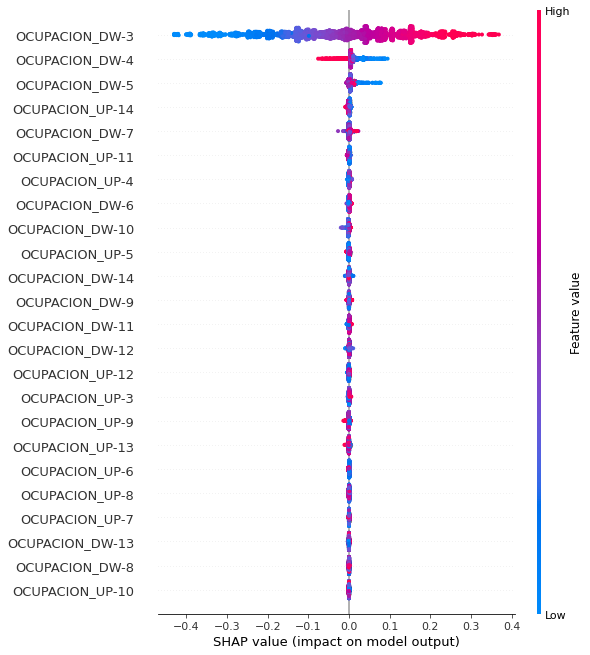

<Figure size 432x288 with 0 Axes>

In [145]:
shap_valid = X_test
shap_values = shap.TreeExplainer(model).shap_values(shap_valid)
plt.figure()
shap.summary_plot(shap_values, shap_valid,max_display=30)
plt.subplots_adjust(left=0.35, right=0.9, top=0.9, bottom=0.3)
plt.show()

In [146]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance

,col_name,feature_importance_vals
11,OCUPACION_DW-3,0.131014
10,OCUPACION_DW-4,0.012315
9,OCUPACION_DW-5,0.006165
12,OCUPACION_UP-14,0.001783
7,OCUPACION_DW-7,0.001653
15,OCUPACION_UP-11,0.001299
22,OCUPACION_UP-4,0.001096
8,OCUPACION_DW-6,0.001054
4,OCUPACION_DW-10,0.001020
21,OCUPACION_UP-5,0.000846


### SELECCIONAR NODOS A PREDECIR

In [13]:
data_ocupacionNodo[['COD_NODO','OCUPACION_DW']].groupby('COD_NODO').count().describe()

,OCUPACION_DW
count,14494.000000
mean,14.399407
std,2.298242
min,0.000000
25%,15.000000
50%,15.000000
75%,15.000000
max,15.000000


array([[<AxesSubplot:title={'center':'OCUPACION_DW'}>]], dtype=object)

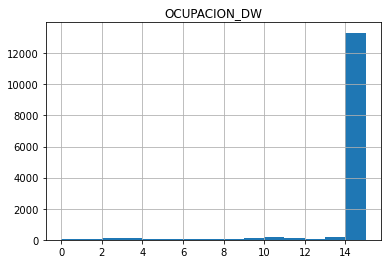

In [14]:
data_ocupacionNodo[['COD_NODO','OCUPACION_DW']].groupby('COD_NODO').count().hist(bins=15)

In [15]:
#data_ocupacionNodo[['COD_NODO','OCUPACION_DW']].groupby('COD_NODO').count()
seleccion=data_ocupacionNodo[['COD_NODO','OCUPACION_DW']].groupby('COD_NODO').count()
seleccion[seleccion['OCUPACION_DW']>=15]

,OCUPACION_DW
COD_NODO,
01J,15
01S,15
02A,15
02J,15
02S,15
...,...
ZVD,15
ZVG,15
ZVS,15


In [16]:
tablaAnalisis=tablaAnalisis.merge(seleccion, on='COD_NODO', how='left')

In [17]:
tablaAnalisis=tablaAnalisis[tablaAnalisis['OCUPACION_DW']>=15]

In [18]:
tablaAnalisis.drop(columns='OCUPACION_DW', inplace=True)

In [19]:
tablaAnalisis.head()

,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
COD_NODO,,,,,,,,,,,,,,,
01J,0.263806,0.316241,0.315418,0.296688,0.290939,0.286734,0.287078,0.311891,0.292409,0.302408,0.363124,0.362382,0.337471,0.350570,0.341121
01S,0.195382,0.220020,0.260913,0.251327,0.358060,0.407106,0.385257,0.395358,0.402865,0.347061,0.401564,0.373240,0.348979,0.432986,0.428994
02A,0.586823,0.566626,0.596677,0.576841,0.613958,0.645071,0.612614,0.641645,0.629706,0.660884,0.732028,0.490259,0.158787,0.206889,0.456174
02J,0.263806,0.316241,0.315418,0.296688,0.290939,0.286734,0.287078,0.311891,0.292409,0.302408,0.363124,0.362382,0.337471,0.350570,0.341121
02S,0.195382,0.220020,0.260913,0.251327,0.358060,0.407106,0.385257,0.395358,0.402865,0.347061,0.401564,0.373240,0.348979,0.432986,0.428994


In [20]:
XVar=tablaAnalisis.drop(columns=[0,-1,-2,])

In [21]:
XVar.head()

,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3
COD_NODO,,,,,,,,,,,,
01J,0.263806,0.316241,0.315418,0.296688,0.290939,0.286734,0.287078,0.311891,0.292409,0.302408,0.363124,0.362382
01S,0.195382,0.220020,0.260913,0.251327,0.358060,0.407106,0.385257,0.395358,0.402865,0.347061,0.401564,0.373240
02A,0.586823,0.566626,0.596677,0.576841,0.613958,0.645071,0.612614,0.641645,0.629706,0.660884,0.732028,0.490259
02J,0.263806,0.316241,0.315418,0.296688,0.290939,0.286734,0.287078,0.311891,0.292409,0.302408,0.363124,0.362382
02S,0.195382,0.220020,0.260913,0.251327,0.358060,0.407106,0.385257,0.395358,0.402865,0.347061,0.401564,0.373240


In [22]:
yvar=tablaAnalisis[-2]

In [23]:
yvar

COD_NODO
01J    0.337471
01S    0.348979
02A    0.158787
02J    0.337471
02S    0.348979
         ...   
ZVD    0.536716
ZVG    0.265490
ZVS    0.294876
ZVT    0.366506
ZVZ    0.533780
Name: -2, Length: 13152, dtype: float64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(XVar, yvar, test_size = 0.3, random_state = 86)

In [25]:
model =LGBMRegressor(n_estimators=800, learning_rate=0.01, reg_alpha=2, reg_lambda=6,)
model.fit(X_train, y_train,  early_stopping_rounds=100, eval_metric= 'mape',
                      eval_set=[(X_train, y_train), (X_test, y_test)], verbose=50)

Training until validation scores don't improve for 100 rounds
[50]	training's mape: 0.0864883	training's l2: 0.0119618	valid_1's mape: 0.0883272	valid_1's l2: 0.0123031
[100]	training's mape: 0.0608975	training's l2: 0.00645445	valid_1's mape: 0.0628441	valid_1's l2: 0.00684734
[150]	training's mape: 0.0466049	training's l2: 0.00426633	valid_1's mape: 0.0487051	valid_1's l2: 0.00474718
[200]	training's mape: 0.0387132	training's l2: 0.0033338	valid_1's mape: 0.0409974	valid_1's l2: 0.00389182
[250]	training's mape: 0.0343663	training's l2: 0.00291121	valid_1's mape: 0.036894	valid_1's l2: 0.00353399
[300]	training's mape: 0.0319432	training's l2: 0.00268712	valid_1's mape: 0.0346716	valid_1's l2: 0.0033491
[350]	training's mape: 0.0305549	training's l2: 0.00255447	valid_1's mape: 0.0334248	valid_1's l2: 0.00323664
[400]	training's mape: 0.0296965	training's l2: 0.00246618	valid_1's mape: 0.0326805	valid_1's l2: 0.00316445
[450]	training's mape: 0.0291303	training's l2: 0.00239945	valid

LGBMRegressor(learning_rate=0.01, n_estimators=800, reg_alpha=2, reg_lambda=6)

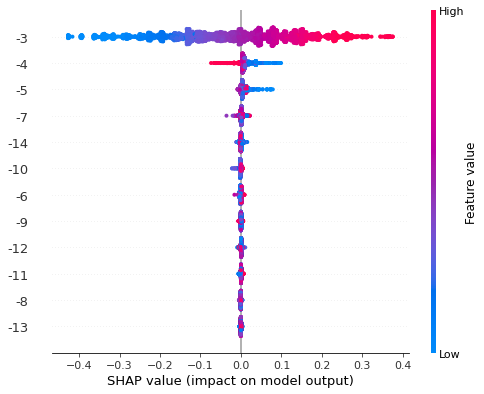

<Figure size 432x288 with 0 Axes>

In [28]:
shap_valid = X_test
shap_values = shap.TreeExplainer(model).shap_values(shap_valid)
plt.figure()
shap.summary_plot(shap_values, shap_valid,max_display=30)
plt.subplots_adjust(left=0.35, right=0.9, top=0.9, bottom=0.3)
plt.show()

In [36]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance

,col_name,feature_importance_vals
11,-3,0.131805
10,-4,0.012287
9,-5,0.006355
7,-7,0.001932
0,-14,0.001676
4,-10,0.001313
8,-6,0.001313
5,-9,0.000896
2,-12,0.000888
3,-11,0.000727


In [42]:
y_predic=model.predict(XVar)

In [43]:
tablaFinal=XVar.copy()
tablaFinal[-2]=y_predic

In [46]:
tablaFinal.head()

,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2
COD_NODO,,,,,,,,,,,,,
01J,0.263806,0.316241,0.315418,0.296688,0.290939,0.286734,0.287078,0.311891,0.292409,0.302408,0.363124,0.362382,0.344761
01S,0.195382,0.220020,0.260913,0.251327,0.358060,0.407106,0.385257,0.395358,0.402865,0.347061,0.401564,0.373240,0.364574
02A,0.586823,0.566626,0.596677,0.576841,0.613958,0.645071,0.612614,0.641645,0.629706,0.660884,0.732028,0.490259,0.449862
02J,0.263806,0.316241,0.315418,0.296688,0.290939,0.286734,0.287078,0.311891,0.292409,0.302408,0.363124,0.362382,0.344761
02S,0.195382,0.220020,0.260913,0.251327,0.358060,0.407106,0.385257,0.395358,0.402865,0.347061,0.401564,0.373240,0.364574


In [47]:
tablaFinalGra=tablaFinal[[-2]]
tablaFinalGra['FECHA']='2021-06-01'


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [64]:
tablaFinalGra.reset_index(inplace=True)

In [68]:
tablaFinalGra['FECHA']=tablaFinalGra['FECHA'].astype('datetime64[ns]')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [70]:
tablaFinalGra[tablaFinalGra['COD_NODO']==nodo].sort_values('FECHA',ascending=True)


,COD_NODO,-2,FECHA
0,01J,0.344761,2021-06-01


In [71]:
data_ocupacionNodo[data_ocupacionNodo['COD_NODO']==nodo].sort_values('FECHA',ascending=True)

,COD_NODO,FECHA,OCUPACION_DW,OCUPACION_UP,mesAnt
108438,01J,2020-06-01,0.263806,0.181200,-14
17764,01J,2020-07-01,0.316241,0.193338,-13
139719,01J,2020-08-01,0.315418,0.198656,-12
44129,01J,2020-09-01,0.296688,0.231599,-11
160613,01J,2020-10-01,0.290939,0.212174,-10
48469,01J,2020-11-01,0.286734,0.234574,-9
156723,01J,2020-12-01,0.287078,0.164449,-8
145251,01J,2021-01-01,0.311891,0.156491,-7
53676,01J,2021-02-01,0.292409,0.202359,-6
141644,01J,2021-03-01,0.302408,0.216276,-5


<AxesSubplot:xlabel='FECHA'>

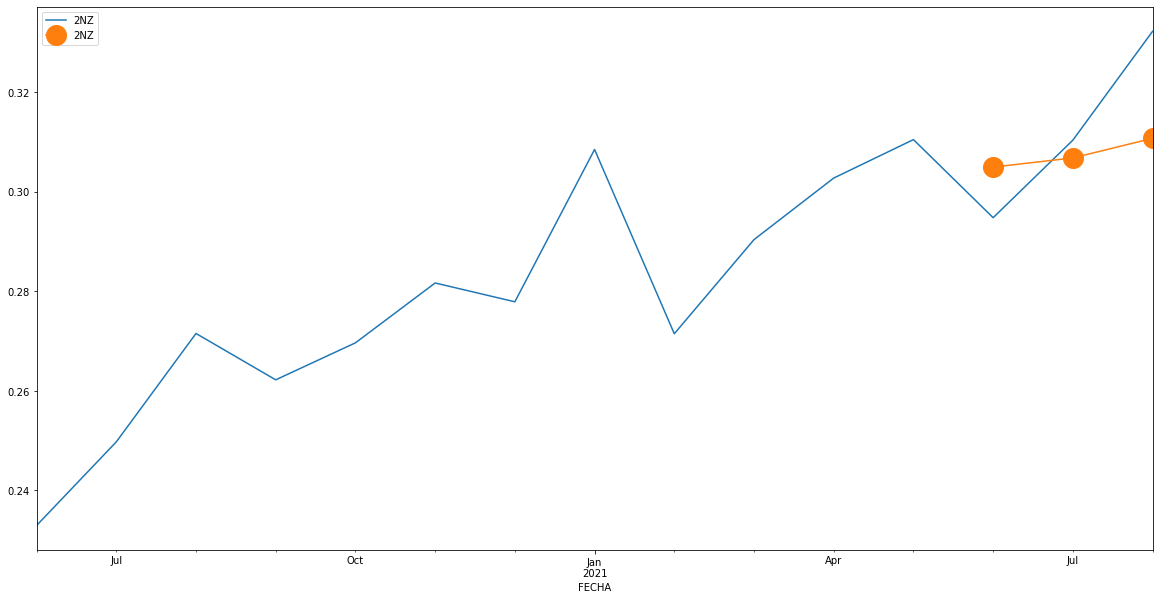

In [130]:
nodo='2NZ'
fig, ax = plt.subplots(figsize=(20,10))
data_ocupacionNodo[data_ocupacionNodo['COD_NODO']==nodo].sort_values('FECHA',ascending=True).plot(x='FECHA',y='OCUPACION_DW',ax=ax, kind='line', label=nodo)
tablaFinalGra[tablaFinalGra['COD_NODO']==nodo].sort_values('FECHA',ascending=True).plot(x='FECHA',y=-2,ax=ax, kind='line', label=nodo, marker=".", markersize=40)

Training until validation scores don't improve for 100 rounds
[50]	training's mape: 0.0881499	training's l2: 0.012474	valid_1's mape: 0.0903653	valid_1's l2: 0.0129629
[100]	training's mape: 0.066189	training's l2: 0.00767229	valid_1's mape: 0.0686882	valid_1's l2: 0.00829437
[150]	training's mape: 0.0541548	training's l2: 0.00570794	valid_1's mape: 0.0569081	valid_1's l2: 0.00648436
[200]	training's mape: 0.0476177	training's l2: 0.00483842	valid_1's mape: 0.0507489	valid_1's l2: 0.00570803
[250]	training's mape: 0.0439238	training's l2: 0.00440748	valid_1's mape: 0.0473842	valid_1's l2: 0.00534091
[300]	training's mape: 0.0417689	training's l2: 0.00417138	valid_1's mape: 0.0454438	valid_1's l2: 0.0051491
[350]	training's mape: 0.0404425	training's l2: 0.0040151	valid_1's mape: 0.044301	valid_1's l2: 0.00502565
[400]	training's mape: 0.0396065	training's l2: 0.00390878	valid_1's mape: 0.0436246	valid_1's l2: 0.0049408
[450]	training's mape: 0.0390086	training's l2: 0.00382245	valid_1'

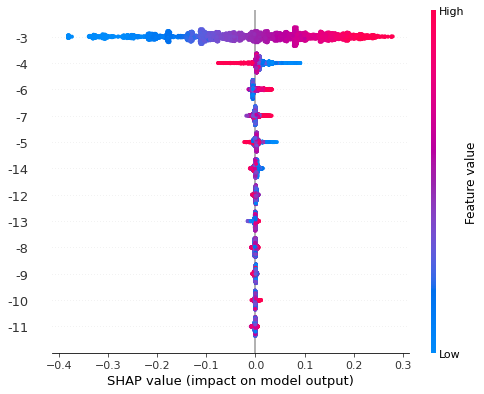

<Figure size 432x288 with 0 Axes>

In [78]:
yvar=tablaAnalisis[-1]
X_train, X_test, y_train, y_test = train_test_split(XVar, yvar, test_size = 0.3, random_state = 86)
model_1 =LGBMRegressor(n_estimators=800, learning_rate=0.01, reg_alpha=2, reg_lambda=6,)
model_1.fit(X_train, y_train,  early_stopping_rounds=100, eval_metric= 'mape',
                      eval_set=[(X_train, y_train), (X_test, y_test)], verbose=200)
shap_valid = X_test
shap_values = shap.TreeExplainer(model_1).shap_values(shap_valid)
plt.figure()
shap.summary_plot(shap_values, shap_valid,max_display=30)
plt.subplots_adjust(left=0.35, right=0.9, top=0.9, bottom=0.3)
plt.show()

In [79]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance


,col_name,feature_importance_vals
11,-3,0.119111
10,-4,0.010464
8,-6,0.007357
7,-7,0.003611
9,-5,0.003248
0,-14,0.002507
2,-12,0.001503
1,-13,0.001268
6,-8,0.001266
5,-9,0.001059


In [118]:
y_predic=model_1.predict(XVar)

#tablaFinal=XVar.copy()
tablaFinal[-1]=y_predic
tablaFinal

,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1
COD_NODO,,,,,,,,,,,,,,
01J,0.263806,0.316241,0.315418,0.296688,0.290939,0.286734,0.287078,0.311891,0.292409,0.302408,0.363124,0.362382,0.344761,0.334051
01S,0.195382,0.220020,0.260913,0.251327,0.358060,0.407106,0.385257,0.395358,0.402865,0.347061,0.401564,0.373240,0.364574,0.375842
02A,0.586823,0.566626,0.596677,0.576841,0.613958,0.645071,0.612614,0.641645,0.629706,0.660884,0.732028,0.490259,0.449862,0.428360
02J,0.263806,0.316241,0.315418,0.296688,0.290939,0.286734,0.287078,0.311891,0.292409,0.302408,0.363124,0.362382,0.344761,0.334051
02S,0.195382,0.220020,0.260913,0.251327,0.358060,0.407106,0.385257,0.395358,0.402865,0.347061,0.401564,0.373240,0.364574,0.375842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVD,0.709359,0.745227,0.792975,0.755224,0.771808,0.801795,0.812894,0.809452,0.693191,0.606031,0.623811,0.630313,0.596793,0.619846
ZVG,0.287564,0.289325,0.293542,0.286910,0.278633,0.303284,0.308401,0.320684,0.291726,0.255091,0.271547,0.288601,0.277363,0.267539
ZVS,0.180983,0.229697,0.200679,0.243319,0.240624,0.146764,0.244961,0.298943,0.278718,0.299920,0.347705,0.352078,0.334947,0.330978


In [123]:
tablaFinalGraAux1=tablaFinal[[-2]]
tablaFinalGraAux1=tablaFinalGraAux1.rename(columns={-2:'prediccion'})
tablaFinalGraAux1['FECHA']='2021-06-01'
#tablaFinalGraAux1
tablaFinalGraAux2=tablaFinal[[-1]]
tablaFinalGraAux2.rename(columns={-1:'prediccion'},inplace=True)
tablaFinalGraAux2['FECHA']='2021-07-01'

tablaFinalGra=tablaFinalGraAux1.append(tablaFinalGraAux2)
tablaFinalGra.reset_index(inplace=True)
tablaFinalGra['FECHA']=tablaFinalGra['FECHA'].astype('datetime64[ns]')
#tablaFinalGraAux1.reset_index(inplace=True)


#tablaFinalGra[tablaFinalGra['COD_NODO']==nodo].sort_values('FECHA',ascending=True)
#
#tablaFinalGra['FECHA']=tablaFinalGra['FECHA'].astype('datetime64[ns]')


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [124]:
tablaFinalGra

,COD_NODO,prediccion,FECHA
0,01J,0.344761,2021-06-01
1,01S,0.364574,2021-06-01
2,02A,0.449862,2021-06-01
3,02J,0.344761,2021-06-01
4,02S,0.364574,2021-06-01
...,...,...,...
26299,ZVD,0.619846,2021-07-01
26300,ZVG,0.267539,2021-07-01
26301,ZVS,0.330978,2021-07-01
26302,ZVT,0.367878,2021-07-01


In [121]:
tablaFinalGra[tablaFinalGra['COD_NODO']=='01S']

,COD_NODO,prediccion,FECHA
1,01S,0.364574,2021-06-01
13153,01S,0.375842,2021-07-01


Training until validation scores don't improve for 100 rounds
[200]	training's mape: 0.0620463	training's l2: 0.00769637	valid_1's mape: 0.0661898	valid_1's l2: 0.0090522
[400]	training's mape: 0.0539939	training's l2: 0.00646207	valid_1's mape: 0.0591532	valid_1's l2: 0.00812029
[600]	training's mape: 0.0515802	training's l2: 0.0059733	valid_1's mape: 0.0573723	valid_1's l2: 0.00778534
[800]	training's mape: 0.0500932	training's l2: 0.00566248	valid_1's mape: 0.0564082	valid_1's l2: 0.00757694
Did not meet early stopping. Best iteration is:
[800]	training's mape: 0.0500932	training's l2: 0.00566248	valid_1's mape: 0.0564082	valid_1's l2: 0.00757694


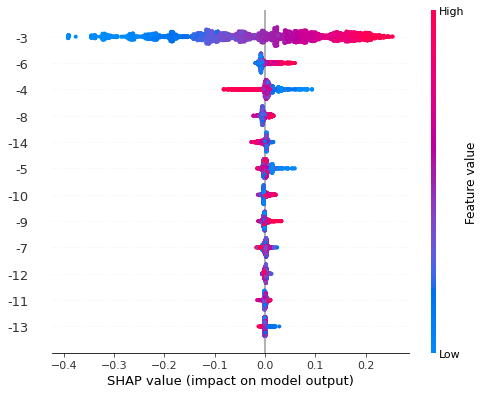

<Figure size 432x288 with 0 Axes>

In [126]:
yvar=tablaAnalisis[0]
X_train, X_test, y_train, y_test = train_test_split(XVar, yvar, test_size = 0.3, random_state = 86)
model_0 =LGBMRegressor(n_estimators=800, learning_rate=0.01, reg_alpha=2, reg_lambda=6,)
model_0.fit(X_train, y_train,  early_stopping_rounds=100, eval_metric= 'mape',
                      eval_set=[(X_train, y_train), (X_test, y_test)], verbose=200)
shap_valid = X_test
shap_values = shap.TreeExplainer(model_0).shap_values(shap_valid)
plt.figure()
shap.summary_plot(shap_values, shap_valid,max_display=30)
plt.subplots_adjust(left=0.35, right=0.9, top=0.9, bottom=0.3)
plt.show()

In [127]:
y_predic=model_0.predict(XVar)
#tablaFinal=XVar.copy()
tablaFinal[0]=y_predic
tablaFinal

,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
COD_NODO,,,,,,,,,,,,,,,
01J,0.263806,0.316241,0.315418,0.296688,0.290939,0.286734,0.287078,0.311891,0.292409,0.302408,0.363124,0.362382,0.344761,0.334051,0.343846
01S,0.195382,0.220020,0.260913,0.251327,0.358060,0.407106,0.385257,0.395358,0.402865,0.347061,0.401564,0.373240,0.364574,0.375842,0.404070
02A,0.586823,0.566626,0.596677,0.576841,0.613958,0.645071,0.612614,0.641645,0.629706,0.660884,0.732028,0.490259,0.449862,0.428360,0.450041
02J,0.263806,0.316241,0.315418,0.296688,0.290939,0.286734,0.287078,0.311891,0.292409,0.302408,0.363124,0.362382,0.344761,0.334051,0.343846
02S,0.195382,0.220020,0.260913,0.251327,0.358060,0.407106,0.385257,0.395358,0.402865,0.347061,0.401564,0.373240,0.364574,0.375842,0.404070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVD,0.709359,0.745227,0.792975,0.755224,0.771808,0.801795,0.812894,0.809452,0.693191,0.606031,0.623811,0.630313,0.596793,0.619846,0.632656
ZVG,0.287564,0.289325,0.293542,0.286910,0.278633,0.303284,0.308401,0.320684,0.291726,0.255091,0.271547,0.288601,0.277363,0.267539,0.276921
ZVS,0.180983,0.229697,0.200679,0.243319,0.240624,0.146764,0.244961,0.298943,0.278718,0.299920,0.347705,0.352078,0.334947,0.330978,0.328989


In [128]:
tablaFinalGraAux1=tablaFinal[[-2]]
tablaFinalGraAux1=tablaFinalGraAux1.rename(columns={-2:'prediccion'})
tablaFinalGraAux1['FECHA']='2021-06-01'
#tablaFinalGraAux1
tablaFinalGraAux2=tablaFinal[[-1]]
tablaFinalGraAux2.rename(columns={-1:'prediccion'},inplace=True)
tablaFinalGraAux2['FECHA']='2021-07-01'

tablaFinalGraAux3=tablaFinal[[0]]
tablaFinalGraAux3.rename(columns={0:'prediccion'},inplace=True)
tablaFinalGraAux3['FECHA']='2021-08-01'

tablaFinalGra=tablaFinalGraAux1.append(tablaFinalGraAux2)
tablaFinalGra=tablaFinalGra.append(tablaFinalGraAux3)
tablaFinalGra.reset_index(inplace=True)
tablaFinalGra['FECHA']=tablaFinalGra['FECHA'].astype('datetime64[ns]')


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
